# تمرین ۵: ارزیابی شباهت تصویر (قسمت ب)

### Importing libraries and setting figs size

In [1]:
import os
import gzip
import math
import pickle
from random import randrange

import numpy as np
import matplotlib.pyplot as plt

### Loading dataset

In [2]:
def load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 784)

    return data


def load_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return labels


def init_mnist():
    dataset = {
        'train_img': load_images('train-images-idx3-ubyte.gz'),
        'train_label': load_labels('train-labels-idx1-ubyte.gz'),
        'test_img': load_images('t10k-images-idx3-ubyte.gz'),
        'test_label': load_labels('t10k-labels-idx1-ubyte.gz')
    }

    with open("mnist.pkl", 'wb') as f:
        pickle.dump(dataset, f, -1)


def load_mnist():
    if not os.path.exists("mnist.pkl"):
        init_mnist()

    with open("mnist.pkl", 'rb') as f:
        dataset = pickle.load(f)

    for key in ('train_img', 'test_img'):
        dataset[key] = dataset[key].astype(np.float32)
        dataset[key] /= 255.0

    for key in ('train_img', 'test_img'):
        dataset[key] = np.reshape(dataset[key], (-1, 28, 28))

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])


(x_train, t_train), (x_test, t_test) = load_mnist()

test_7 = x_test[t_test == 7]
test_7_len = len(test_7)
test_3 = x_test[t_test == 3]
test_3_len = len(test_3)
train_7 = x_train[t_train == 7]
train_7_len = len(train_7)
train_3 = x_train[t_train == 3]
train_3_len = len(train_3)

### Calculating 7s average

In [3]:
avg_train_7 = np.zeros((28, 28))
for train in train_7:
    avg_train_7 += train / train_7_len

### Calculating 3s average

In [4]:
avg_train_3 = np.zeros((28, 28))
for train in train_3:
    avg_train_3 += train / train_3_len

### Defining MSE function

In [5]:
def MSE(img_x, img_y):
    return ((img_x - img_y) ** 2).sum() / (img_x.shape[0] * img_y.shape[1])

### Defining PSNR function

In [6]:
def PSNR(img_x, img_y):
    mse = MSE(img_x, img_y)
    if mse == 0:
        return math.inf
    return 10 * np.log((255 ** 2) / mse)

### ploting random cases with MSE and PSNR values

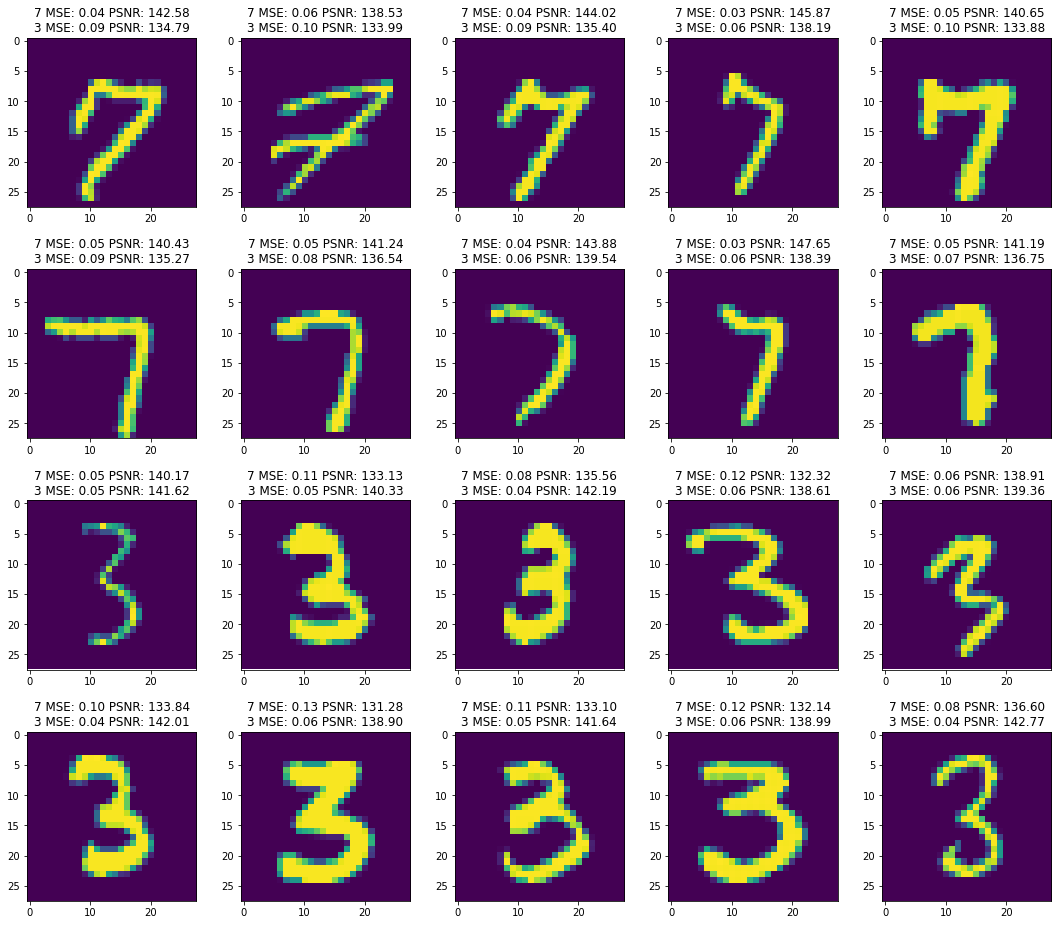

In [7]:
_, subplt = plt.subplots(4, 5, figsize=(15, 13))
plt.tight_layout()

for i in range(2):
    for j in range(5):
        index = randrange(test_7_len)
        mse7 = MSE(avg_train_7, test_7[index])
        psnr7 = PSNR(avg_train_7, test_7[index])
        mse3 = MSE(avg_train_3, test_7[index])
        psnr3 = PSNR(avg_train_3, test_7[index])

        subplt[i][j].imshow(test_7[index])
        subplt[i][j].set_title(
            "7 MSE: {:.2f} PSNR: {:.2f}\n3 MSE: {:.2f} PSNR: {:.2f}".format(mse7, psnr7, mse3, psnr3))
    for j in range(5):
        index = randrange(test_3_len)
        mse7 = MSE(avg_train_7, test_3[index])
        psnr7 = PSNR(avg_train_7, test_3[index])
        mse3 = MSE(avg_train_3, test_3[index])
        psnr3 = PSNR(avg_train_3, test_3[index])

        subplt[i + 2][j].imshow(test_3[index])
        subplt[i + 2][j].set_title(
            "7 MSE: {:.2f} PSNR: {:.2f}\n3 MSE: {:.2f} PSNR: {:.2f}".format(mse7, psnr7, mse3, psnr3))

plt.show()

دو ردیف بالا مربوط به تصاویر اعداد ۷ بوده و دو دریف سمت پایین اعداد ۳ هستند و مقدار خروجی توابع مورد نظر با تصویر ۳ و ۷ میانگین برای هر نمونه محاسبه و بالای آن نوشته شده است. در هر بار اجرا عکس های نمونه به صورت رندم از دیتاست خوانده و مقادیر محاسبه می شوند

مشاهده می شود برای تمامی ۷ ها مقدار عدد های شباهت به دست امده نسبت به ۷ میانگین بیشتر از ۳ میانگین بوده و همین طور برای ۳ ها عدد های شباهت همگی در ۳ میانگین عدد بهتری نسبت به ۷ میانگین نشان می دهند. این امر نشان دهنده کارا بودن این روش می باشد